>>> ## Deep Learning - "CNN + MNIST"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split


In [28]:
import tensorflow as tf
import keras
import math
from keras.layers import Dense
from keras.layers import Conv2D
from keras.utils import to_categorical, plot_model

## Loading and split data

In [34]:
mnist = keras.datasets.mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()
#xvalid, yvalid = xtrain[:10000], ytrain[:10000]
#xtrain, ytrain = xtrain[10000:], ytrain[10000:]

## Plotting the data

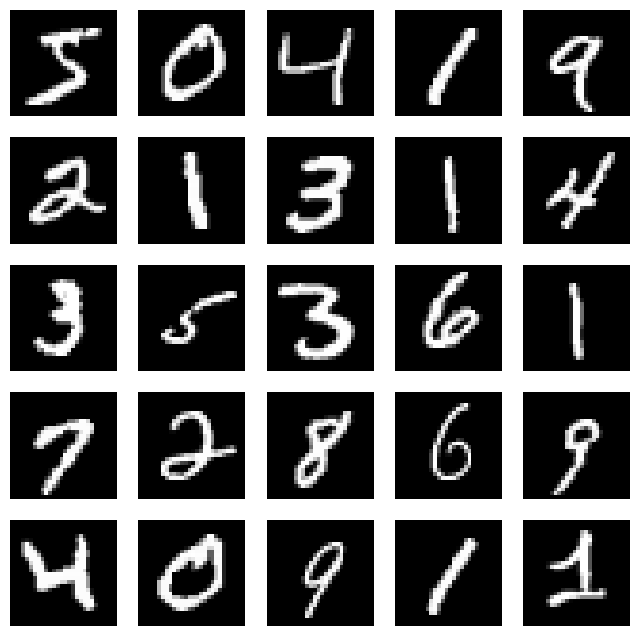

In [35]:
def show_img(img):
    plt.imshow(img)
    plt.axis("off")
def show_img_grid(img):
    plt.figure(figsize=(8, 8))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.imshow(img[i], cmap="gray")
        plt.axis("off")
    plt.show()

show_img_grid(xtrain)

In [37]:
X_train = xtrain.reshape((xtrain.shape[0], 28* 28)).astype("float32") / 255
X_test = xtest.reshape((xtest.shape[0], 28*28)).astype("float32") / 255
#X_valid = xvalid.reshape((xvalid.shape[0], 28 * 28)).astype("float32") / 255

In [38]:
print(X_train.shape)
#print(X_valid.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [8]:
print(f"labels: {np.unique(ytrain)} - shape: {ytrain.shape}")
#print(f"labels: {np.unique(yvalid)} - shape: {yvalid.shape}")
print(f"labels: {np.unique(ytest)} - shape: {ytest.shape}")

labels: [0 1 2 3 4 5 6 7 8 9] - shape: (50000,)
labels: [0 1 2 3 4 5 6 7 8 9] - shape: (10000,)
labels: [0 1 2 3 4 5 6 7 8 9] - shape: (10000,)


In [39]:
y_train = to_categorical(ytrain)
#y_valid = to_categorical(yvalid)
y_test = to_categorical(ytest)

In [40]:
def dense_mpl_model():
    neuron_size = 128
    neuron_out  = 10
    model = keras.Sequential()
    model.add(Dense(neuron_size, activation="relu", input_shape=(X_train.shape[1], )))
    model.add(Dense(neuron_size, activation="relu"))
    model.add(Dense(neuron_out, activation="softmax"))
    #model.summary()
    model.compile(
        optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
    return model

In [11]:
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = [], []
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    for train_idx, test_idx in kfold.split(dataX):
        model = dense_mpl_model()
        trainX, trainY, testX, testY = dataX[train_idx], dataY[train_idx], dataX[test_idx], dataY[test_idx]
        history = model.fit(trainX, trainY, epochs=10, batch_size=64, validation_data=(testX, testY))
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        scores.append(acc)
        histories.append(history)
    return scores, histories

In [24]:
def plot_summary_mode(histories):
    for i in range(len(histories)):
        plt.figure(figsize=(18, 5))
        plt.subplot(1, 2, 1)
        plt.title('Loss')
        plt.plot(histories[i].history['loss'], color='green', label='train')
        plt.plot(histories[i].history['val_loss'], color='blue', label='test')

        plt.subplot(1, 2, 2)
        plt.title('Accuracy')
        plt.plot(histories[i].history['accuracy'], color='green', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='blue', label='test')
        plt.show()

In [41]:
def plot_summary_model(histories):
    n_histories = len(histories)
    n_figures = math.ceil(n_histories/4)

    for fig_num in range(n_figures):
        plt.figure(figsize=(15, 10))

        for i in range(4):
            history_idx = fig_num * 4 + i

            if history_idx >= n_histories:
                break

            row = i // 2  
            col = i % 2   
            position = row * 2 + col + 1 

            plt.subplot(2, 2, position)

            plt.plot(
                histories[history_idx].history['loss'],
                color='green', linestyle='-', 
                label='train loss')
            plt.plot(
                histories[history_idx].history['val_loss'],
                color='blue', linestyle='-', 
                label='val loss')
            plt.plot(
                histories[history_idx].history['accuracy'],
                color='green', linestyle='--', 
                label='train acc')
            plt.plot(
                histories[history_idx].history['val_accuracy'],
                color='blue', linestyle='--', 
                label='val acc')

            plt.title(f'História {history_idx+1}')
            plt.xlabel('Época')
            plt.ylabel('Loss / Accuracy')
            plt.legend(loc='center right')
            plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8559 - loss: 0.4942 - val_accuracy: 0.9385 - val_loss: 0.2074
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9599 - loss: 0.1334 - val_accuracy: 0.9635 - val_loss: 0.1231
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9740 - loss: 0.0874 - val_accuracy: 0.9655 - val_loss: 0.1201
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9787 - loss: 0.0692 - val_accuracy: 0.9661 - val_loss: 0.1201
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9850 - loss: 0.0507 - val_accuracy: 0.9733 - val_loss: 0.0976
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9880 - loss: 0.0381 - val_accuracy: 0.9713 - val_loss: 0.1176
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9900 - loss: 0.0310 - val_accuracy: 0.9723 - val_loss: 0.1077
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9913 - loss: 0.0263 - val_accuracy: 0.

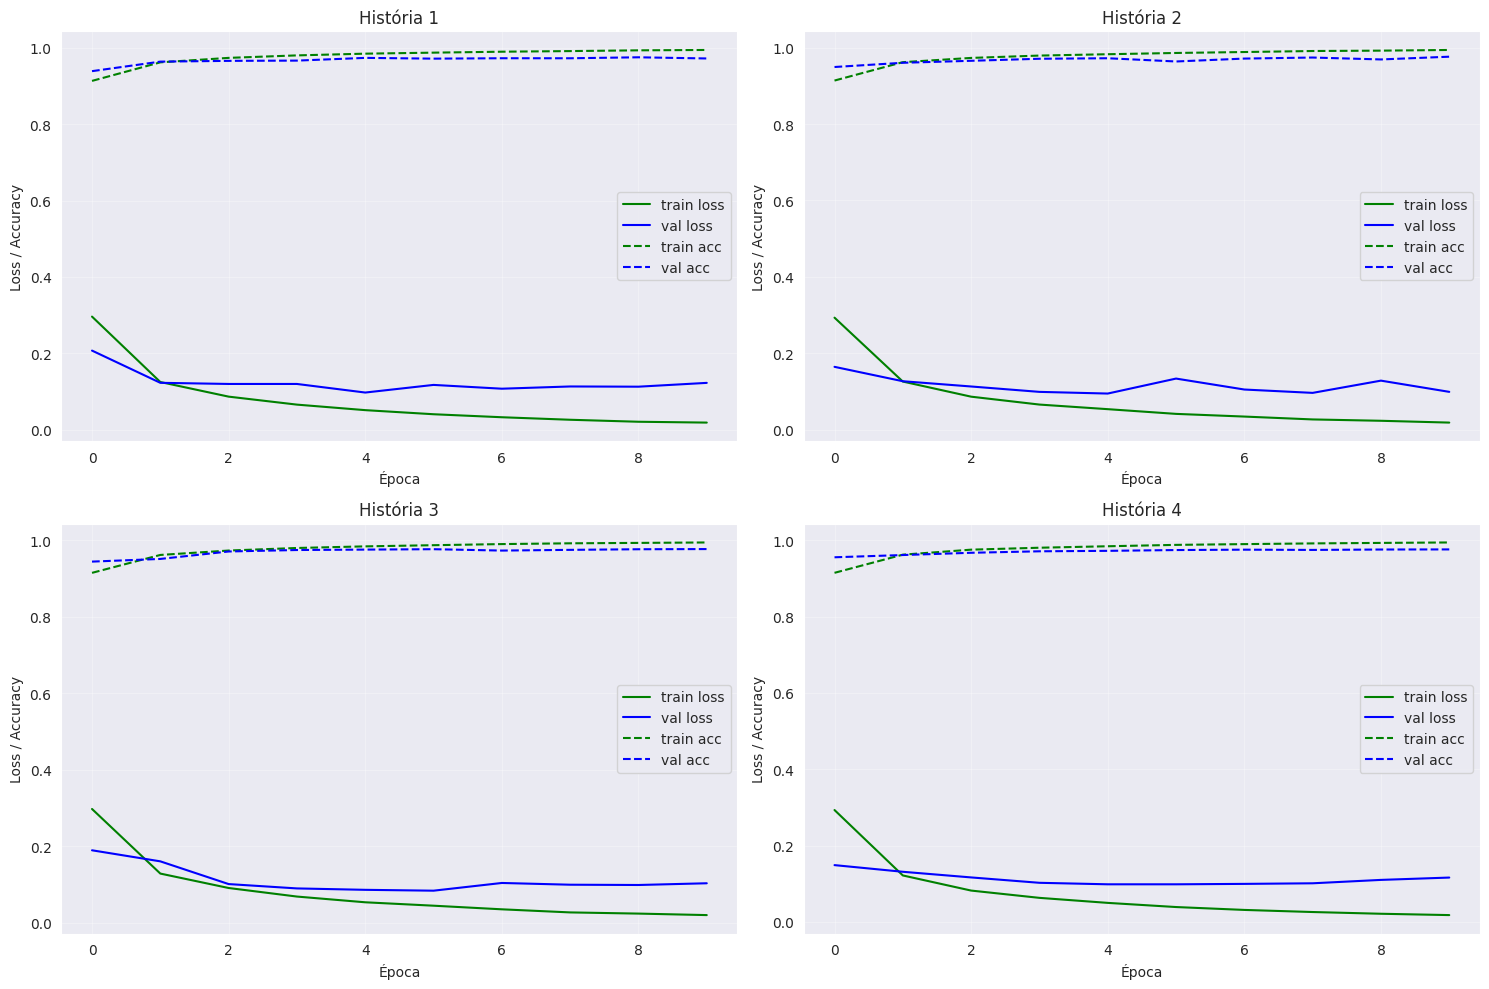

In [42]:
scores, histories = evaluate_model(X_train, y_train, 4)
plot_summary_model(histories)

> ## Using CNN

In [44]:
X_train = xtrain.reshape((xtrain.shape[0], 28,  28)).astype("float32") / 255
X_test = xtest.reshape((xtest.shape[0], 28,  28)).astype("float32") / 255

In [45]:
y_train = to_categorical(ytrain)
y_test = to_categorical(ytest)

In [46]:
def cnn_model():
    model = keras.Sequential()
    model.add(
        Conv2D(6, (3, 3), kernel_initializer='he_uniform', activation='relu', input_shape=(28, 28, 1)))
    model.add(keras.layers.MaxPooling2D((2, 2)))

    #model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', activation='relu'))
    model.add(Conv2D(10, (3, 3), kernel_initializer='he_uniform', activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2)))

    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(80, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))

    model.compile(
        optimizer='adam', 
        loss='categorical_crossentropy', 
        metrics=['accuracy'])
    return model

In [47]:
def evaluate_model_cnn(dataX, dataY, n_folds=5, batch_size=64):
    scores, histories = [], []
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    for train_idx, test_idx in kfold.split(dataX):
        model = cnn_model()
        trainX, trainY, testX, testY = dataX[train_idx], dataY[train_idx], dataX[test_idx], dataY[test_idx]
        history = model.fit(trainX, trainY,
                            epochs=10,
                            batch_size=batch_size,
                            validation_data=(testX, testY))
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        scores.append(acc)
        histories.append(history)
    return scores, histories

In [48]:
X_train.shape

(60000, 28, 28)

In [49]:
scores, histories = evaluate_model_cnn(X_train, y_train)

750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9863 - loss: 0.0444 - val_accuracy: 0.9778 - val_loss: 0.0705
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9897 - loss: 0.0334 - val_accuracy: 0.9801 - val_loss: 0.0653
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9900 - loss: 0.0304 - val_accuracy: 0.9843 - val_loss: 0.0485
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9928 - loss: 0.0231 - val_accuracy: 0.9843 - val_loss: 0.0527
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9923 - loss: 0.0223 - val_accuracy: 0.9859 - val_loss: 0.0437
Epoch 9/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9952 - loss: 0.0153 - val_accuracy: 0.9822 - val_loss: 0.0609
Epoch 10/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9952 - loss: 0.0156 - val_accuracy: 0.9842 - val_loss: 0.0548
> 98.417
Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8645 - loss: 0.4360 - val_accuracy: 0.9

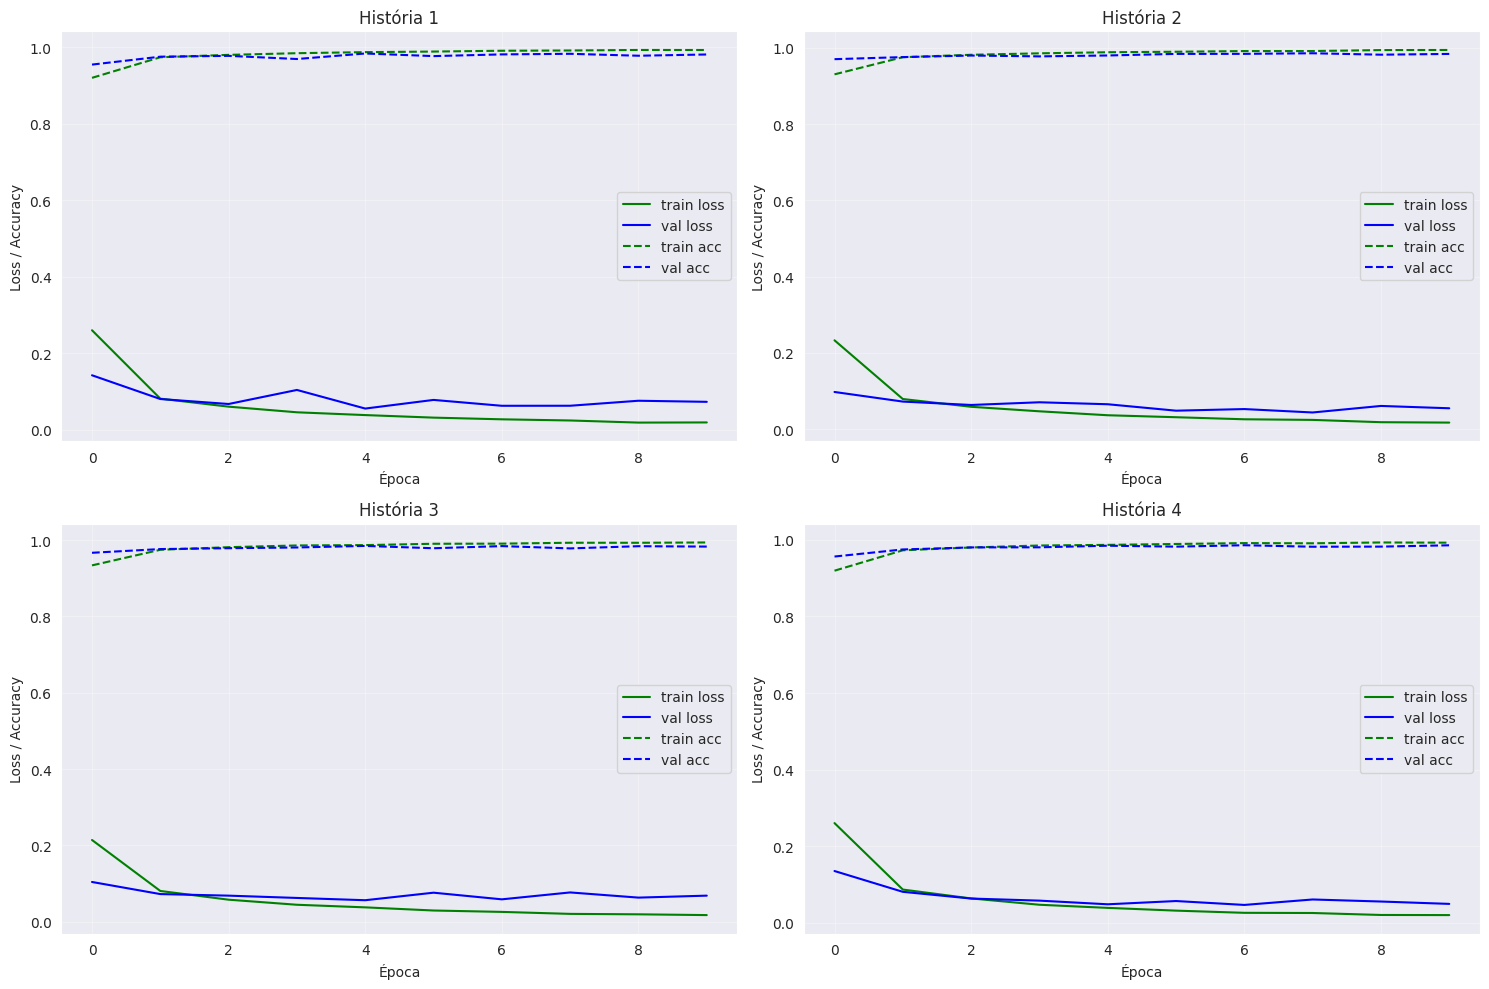

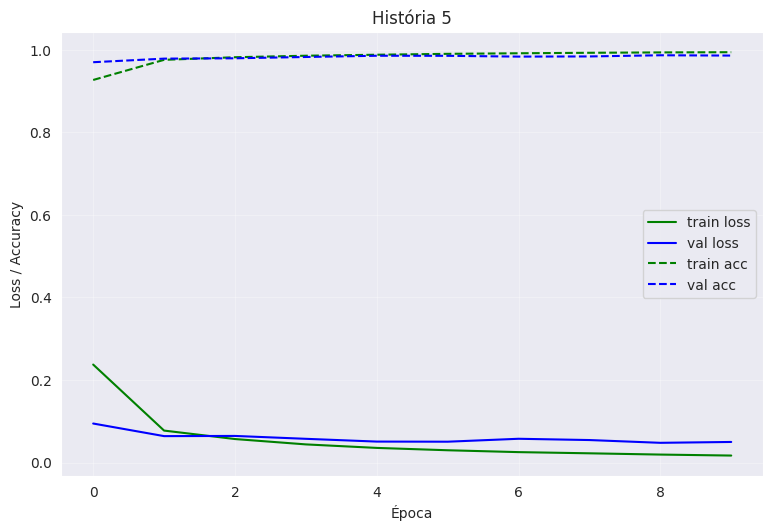

In [50]:
plot_summary_model(histories)